In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [22]:
try:
    df = pd.read_csv("./Salary_dataset.csv")
except:
    print("File not found")

In [23]:
df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [24]:
X = df[['YearsExperience']]
X

,YearsExperience
0,1.2
1,1.4
2,1.6
3,2.1
4,2.3
5,3.0
6,3.1
7,3.3
8,3.3
9,3.8


In [25]:
y = df['Salary']
y

0      39344.0
1      46206.0
2      37732.0
3      43526.0
4      39892.0
5      56643.0
6      60151.0
7      54446.0
8      64446.0
9      57190.0
10     63219.0
11     55795.0
12     56958.0
13     57082.0
14     61112.0
15     67939.0
16     66030.0
17     83089.0
18     81364.0
19     93941.0
20     91739.0
21     98274.0
22    101303.0
23    113813.0
24    109432.0
25    105583.0
26    116970.0
27    112636.0
28    122392.0
29    121873.0
Name: Salary, dtype: float64

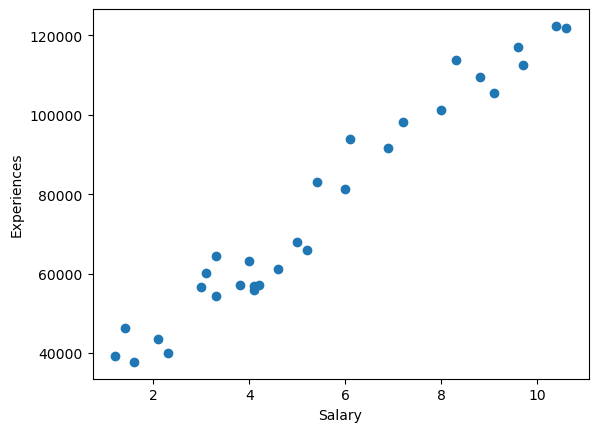

In [28]:
# Scatter plot
scatter_plot = plt.scatter(df['YearsExperience'], df['Salary'])
plt.xlabel('Salary')
plt.ylabel('Experiences')
scatter_plot

In [29]:
df.corr()

,Unnamed: 0,YearsExperience,Salary
Unnamed: 0,1.000000,0.986460,0.960826
YearsExperience,0.986460,1.000000,0.978242
Salary,0.960826,0.978242,1.000000


In [35]:
from sklearn import model_selection

In [43]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=42)

In [41]:
# Standardization
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [46]:
X_test = scaler.transform(X_test)

In [47]:
# Apply Linear Regression
from sklearn.linear_model import LinearRegression

In [49]:
reg = LinearRegression(n_jobs=-1)

In [52]:
reg.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [55]:
print("Cofiecient or Slope", reg.coef_)
print("Intercept", reg.intercept_)

Cofiecient or Slope [25063.1519945]
Intercept 70417.40909090909


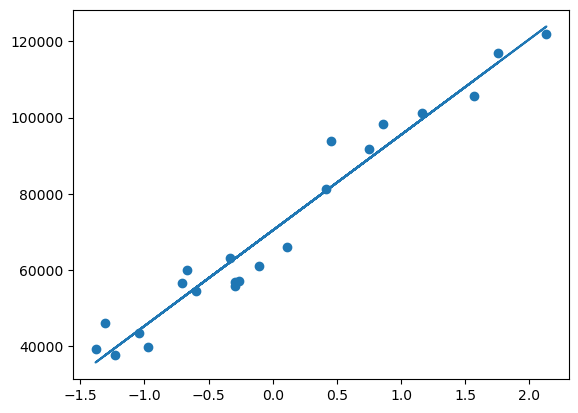

In [57]:
#  Plot the best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train, reg.predict(X_train))

## Prediction of test data
1. predicted salary output = intercept + coef (Experience)
2. y_pred_test = 70417.40909090909 + 25063.1519945(X_test)

In [58]:
# prediction for the test data
y_pred = reg.predict(X_test)
y_pred

array([115440.88180109,  71397.10622651, 102321.45928951,  75145.51265839,
        55466.37889103,  60151.88693088, 122000.59305688, 107006.96732936])

In [61]:
# Performance Matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [63]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("mse:", mse)
print("mae:" ,mae)
print("rmse:" ,rmse)

mse: 38802588.99247059
mae: 5056.9954666635895
rmse: 6229.172416338352


# R sqaure
#### Formula

R^2 = 1-SSR/SST

In [64]:
from sklearn.metrics import r2_score

In [65]:
score = r2_score(y_test, y_pred)
score

0.9347210011126783

# Adjusted R square

In [66]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.9238411679647913

In [74]:
reg.predict([[1.2]])

array([100493.19148431])